# PHYS 404, Homework 8, 3/12/2023

In real-world applications, the advection velocity $v$ is usually variable.  For example,

\begin{equation}
\frac{\partial U}{\partial t}+U\frac{\partial U}{\partial x}=0.
\end{equation}

This is called Burger's equation, where the advection velocity depends on the property being advected, i.e., $U$.

1) Let's try the upwind method to solve this equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

2) Please experiment with different grid sizes.

3) Now the solution develops a non-symmetric profile over time.  Can you explain why?

## 1. Try the upwind method to solve Burger's equation with an initial Gaussian profile. (U before $\frac{\partial U}{\partial x}$ is velocity at n and j)

t =  1.12
t =  2.080000000000001
t =  3.040000000000002
t =  4.000000000000003
t =  5.120000000000004
t =  6.0800000000000045
t =  7.040000000000005
t =  8.000000000000005
t =  9.120000000000006
t =  10.080000000000007
Done.


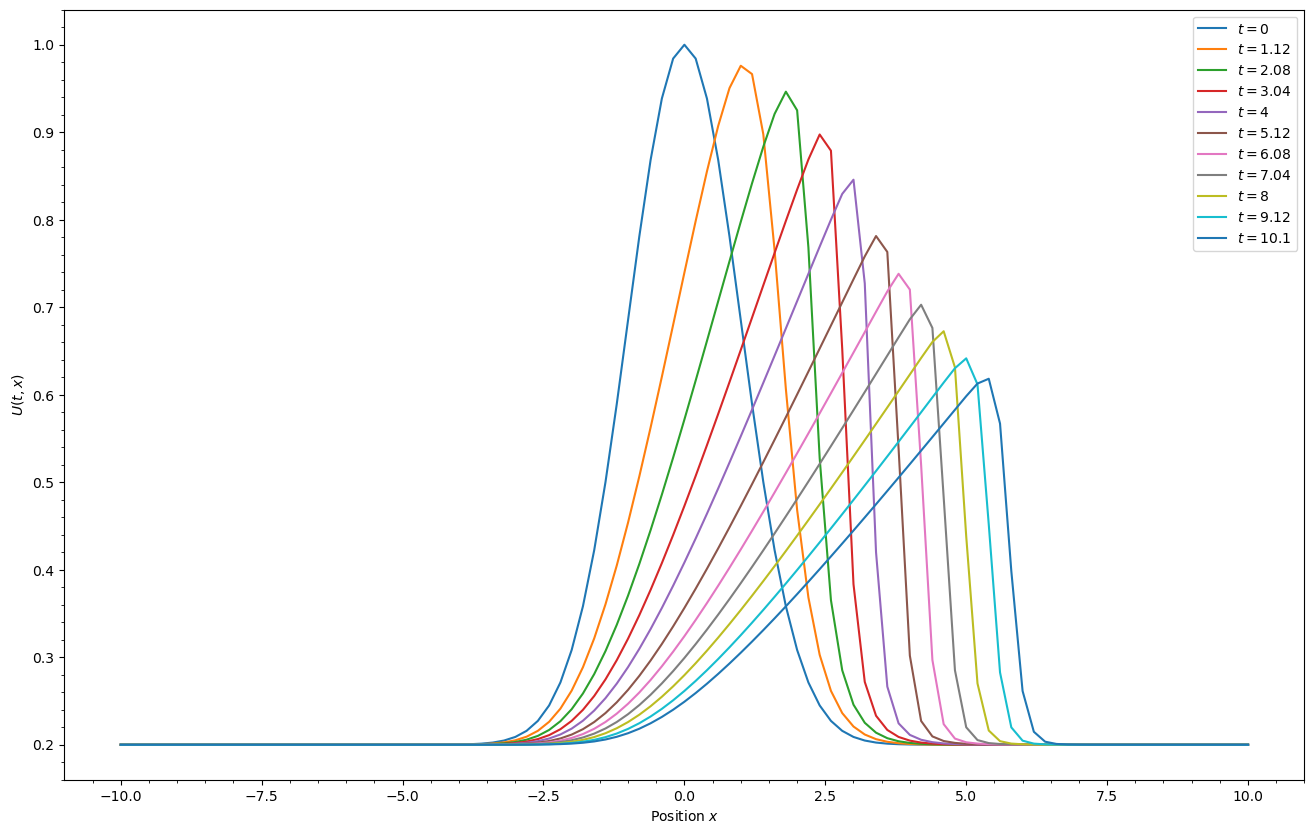

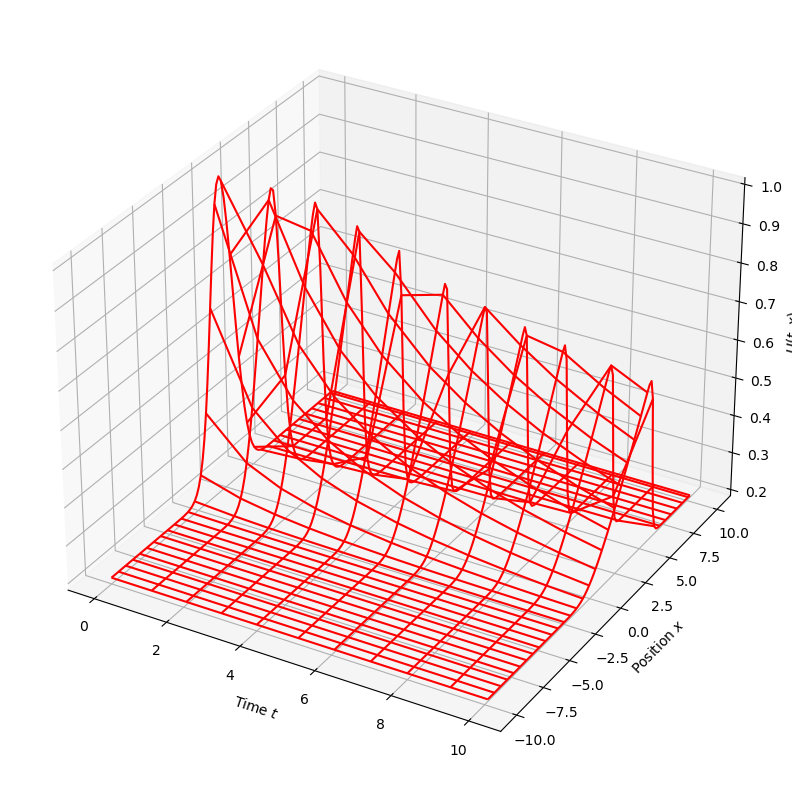

In [24]:
# Burger's equation:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
Nx = 101      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)
    
    # Find the state at the next time step using the upwind method.
    # here is the modified parts of the advected scenario
    
    # compute the solution with the changing vel, i.e., Uold[ix]
    for ix in range(1, Nx - 1):
        if Uold[ix] > 0:
            # we know that U is the velocity before delU/delx, thus:
            U[ix] = Uold[ix] - dt*Uold[ix]*(Uold[ix] - Uold[ix-1])/dx
            
        else:
            U[ix] = Uold[ix] - dt*Uold[ix]*(Uold[ix+1] - Uold[ix])/dx
            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig = plt.figure(figsize=(16,10))
ax3D = fig.add_subplot(projection='3d')
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

## 2. Experiment with different grid size

case 1: grid size = 1000

t =  1.0080000000000007
t =  2.0000000000000013
t =  3.0080000000000022
t =  4.000000000000003
t =  5.008000000000004
t =  6.000000000000004
t =  7.008000000000005
t =  8.000000000000005
t =  9.008000000000006
t =  10.000000000000007
Done.


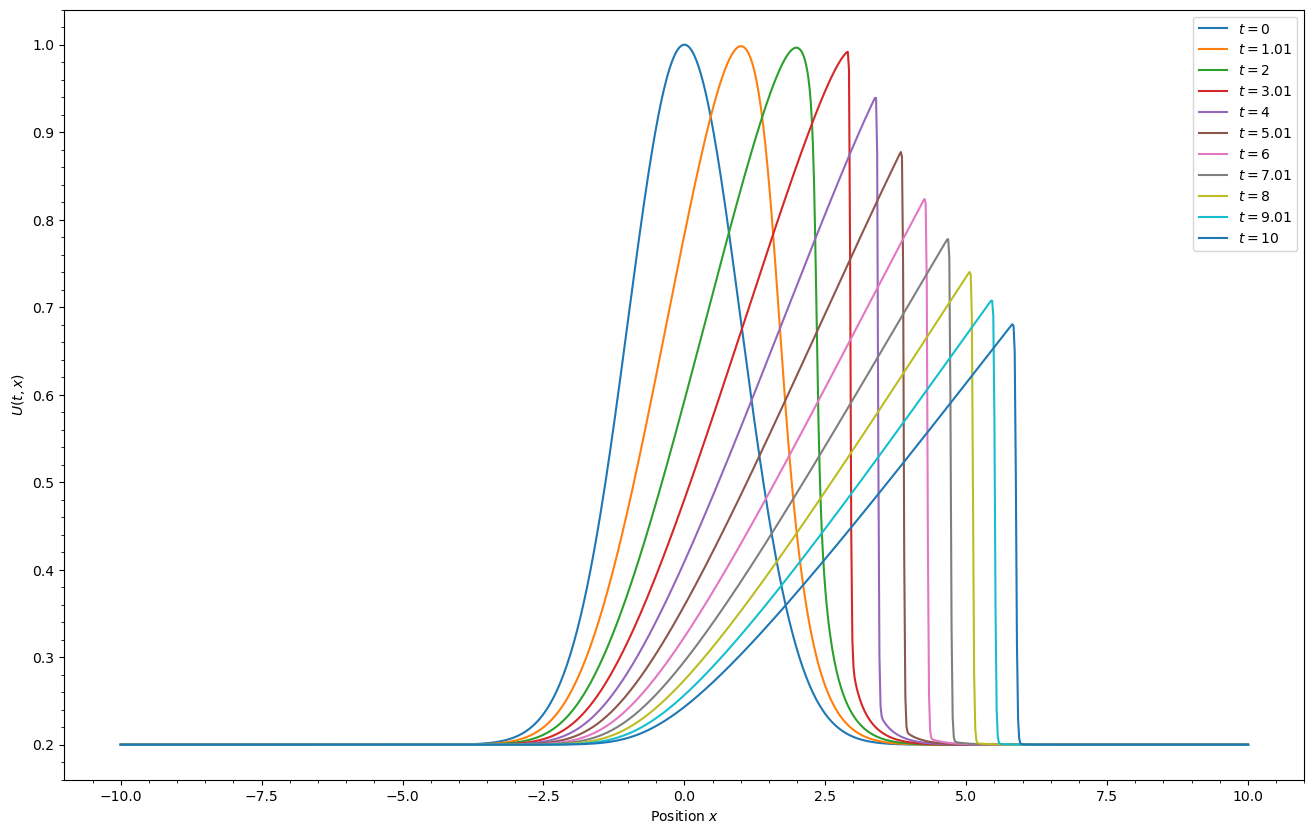

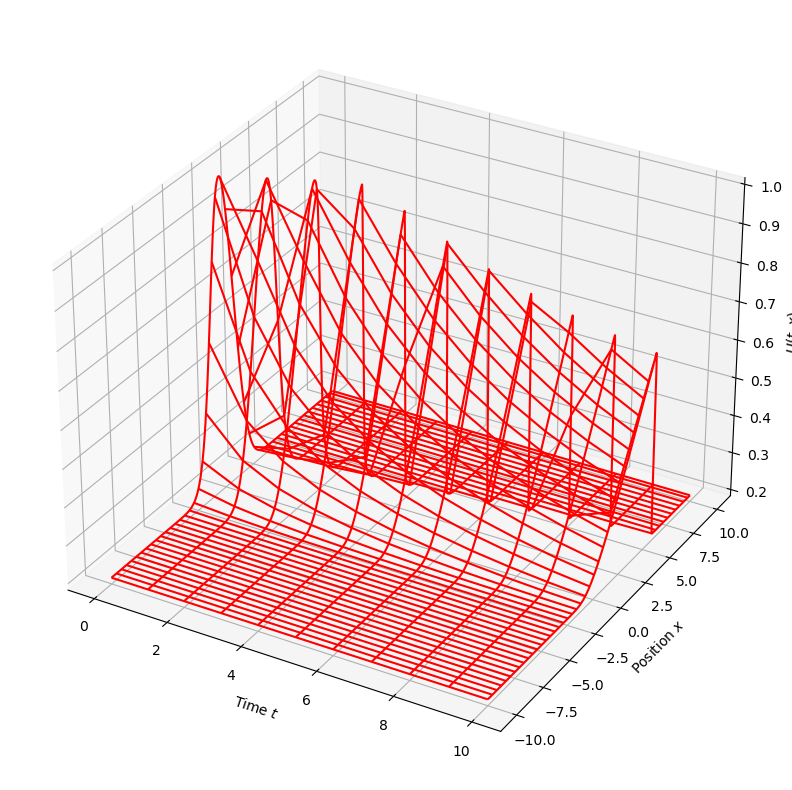

In [22]:
# Burger's equation:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
''' 
    try a grid size of 1000
'''
Nx = 1001      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)
    
    # Find the state at the next time step using the upwind method.
    # here is the modified parts of the advected scenario
    
    # compute the solution with the changing vel, i.e., Uold[ix]
    for ix in range(1, Nx - 1):
        if Uold[ix] > 0:
            # we know that U is the velocity before delU/delx, thus:
            U[ix] = Uold[ix] - dt*Uold[ix]*(Uold[ix] - Uold[ix-1])/dx
            
        else:
            U[ix] = Uold[ix] - dt*Uold[ix]*(Uold[ix+1] - Uold[ix])/dx
            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig = plt.figure(figsize=(16,10))
ax3D = fig.add_subplot(projection='3d')
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

case 2: grid size = 10

t =  1.6
t =  3.2
t =  4.800000000000001
t =  6.4
t =  8.0
t =  9.6
t =  11.2
Done.


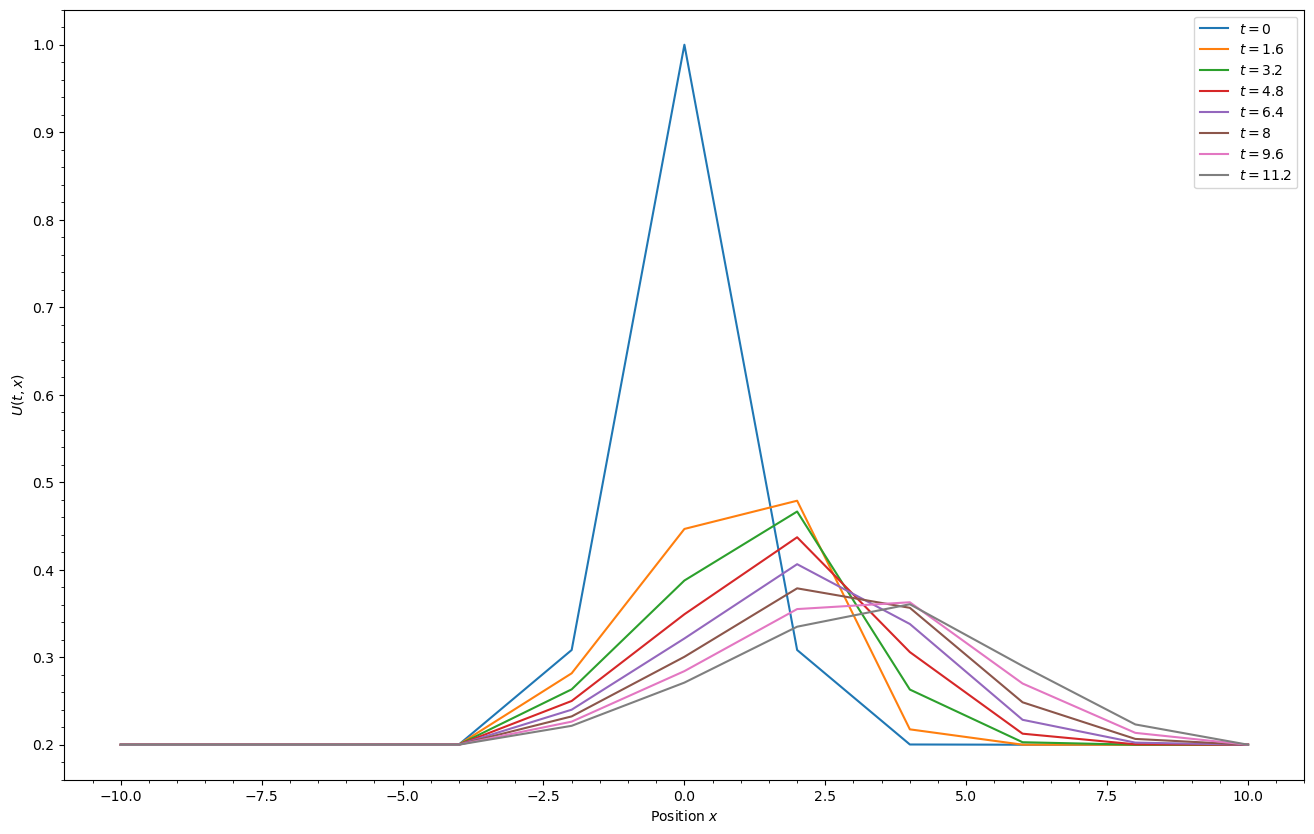

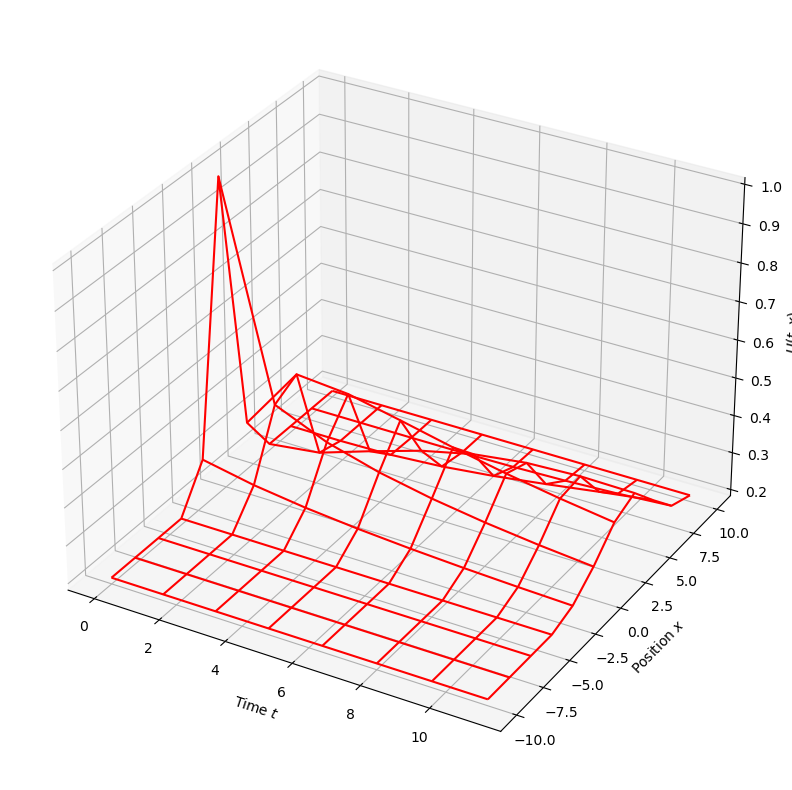

In [21]:
# Burger's equation:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Model Parameters
xmin = -10.0   # left boundary
xmax = +10.0   # right boundary
''' 
    try a grid size of 10
'''
Nx = 11      # number of grid points (including boundary)
tend = 10.0    # end time
dtout = 1.0   # time interval for outputs

# Set up the grid.
x = np.linspace(xmin, xmax, Nx)
dx = (xmax - xmin) / (Nx - 1)
dt = 0.8 * dx
U = np.zeros(Nx,)

# Give the initial profile.
t = 0.0
U = 0.2 + 0.8 * np.exp(-0.5 * x**2)

# Prepare for 3D outputs.
tp = [t]
Up = np.copy(U)

# Initiate the plot.
fig = plt.figure(figsize=(16,10))
ax = fig.gca()
ax.plot(x, U, label=r"$t = {:.3G}$".format(t))
ax.set_xlabel(r"Position $x$")
ax.set_ylabel(r"$U(t,x)$")
ax.minorticks_on()

# Begin the simulation.
tout = t + dtout
while t < tend:
    # Backup the previous time step.
    Uold = np.copy(U)
    
    # Find the state at the next time step using the upwind method.
    # here is the modified parts of the advected scenario
    
    # compute the solution with the changing vel, i.e., Uold[ix]
    for ix in range(1, Nx - 1):
        if Uold[ix] > 0:
            # we know that U is the velocity before delU/delx, thus:
            U[ix] = Uold[ix] - dt*Uold[ix]*(Uold[ix] - Uold[ix-1])/dx
            
        else:
            U[ix] = Uold[ix] - dt*Uold[ix]*(Uold[ix+1] - Uold[ix])/dx
            
    t += dt

    # Save the data after every dtout.
    if t >= tout:
        plt.plot(x, U, label=r"$t = {:.3G}$".format(t))
        tp.append(t)
        Up = np.vstack((Up, U))
        print("t = ", t)
        tout += dtout

ax.legend()

# Create 3D-view of the solution.
t, x = np.meshgrid(tp, x)
fig = plt.figure(figsize=(16,10))
ax3D = fig.add_subplot(projection='3d')
ax3D.plot_wireframe(t, x, Up.transpose(), color="red")
ax3D.set_xlabel("Time $t$")
ax3D.set_ylabel("Position $x$")
ax3D.set_zlabel(r"$U(t,x)$")

print("Done.")
plt.show()

## 3. Explain why the solution develops a non-symmetric profile over time.

In the upwind method, the value of the dependent variable at a point is determined by the value of the dependent variable at the previous point in the direction of the velocity. This can lead to numerical diffusion, meaning the solution is spread out over a larger region than the actual physical region. As we know the velocity in this scenario is just U(nj) before taking the partial derivatives. It leads into the numerical solution experiencing diffusion step by step, thus showing diverged solution plot. This numerical diffusion can cause the solution to develop a non-symmetric profile over time.